##### Data Cleaning

In [1]:
import pandas as pd
import numpy as np


In [2]:
# !wget 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv'
file_name = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv'
df_students = pd.read_csv(file_name,header='infer', delimiter=',')
df_students.head()

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


In [3]:
df_students.isnull().sum()


Name          0
StudyHours    1
Grade         2
dtype: int64

In [4]:
df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


In [5]:
df_students['StudyHours']= df_students['StudyHours'].fillna(df_students['StudyHours'].mean())
df_students

,Name,StudyHours,Grade
0,Dan,10.000000,50.0
1,Joann,11.500000,50.0
2,Pedro,9.000000,47.0
3,Rosie,16.000000,97.0
4,Ethan,9.250000,49.0
5,Vicky,1.000000,3.0
6,Frederic,11.500000,53.0
7,Jimmie,9.000000,42.0
8,Rhonda,8.500000,26.0
9,Giovanni,14.500000,74.0


In [6]:
df_students = df_students.dropna(axis=0, how='any')
df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


In [7]:
'{:.2f}'.format(df_students.StudyHours.mean())

'10.52'

In [8]:
'{:.2f}'.format(df_students.Grade.mean())

'49.18'

In [9]:
df_students[df_students['StudyHours']>df_students['StudyHours'].mean()]

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


In [10]:
df_students[df_students['StudyHours']>df_students['StudyHours'].mean()].Grade.mean()

66.7

In [11]:
df_students[df_students['Grade']>df_students['Grade'].mean()].StudyHours.mean()

13.159090909090908

In [12]:
passes = pd.Series(df_students['Grade']>=60)
passes

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11     True
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19    False
20     True
21     True
Name: Grade, dtype: bool

In [13]:
df_students = pd.concat([df_students, passes.rename('Pass')], axis=1)
df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


In [14]:
df_students.groupby(df_students['Pass'])['Name'].count()

Pass
False    15
True      7
Name: Name, dtype: int64

In [16]:
df_students.groupby(df_students['Pass'])['StudyHours','Grade'].mean()

C:\Users\65859\AppData\Local\Temp\ipykernel_4112\3274619130.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_students.groupby(df_students['Pass'])['StudyHours','Grade'].mean()


,StudyHours,Grade
Pass,,
False,8.783333,38.000000
True,14.250000,73.142857


In [17]:
df_students.sort_values('Grade', ascending=False)

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


##### Data Visualization

In [22]:
# !pip install matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

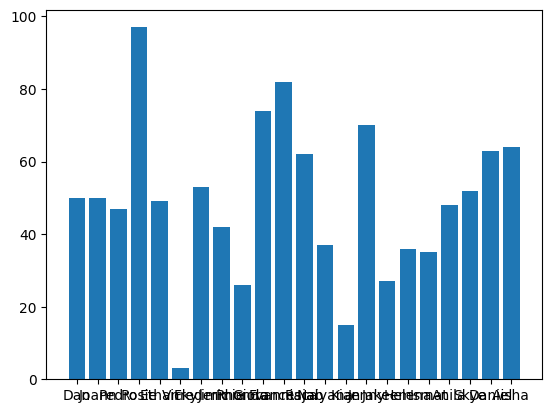

In [25]:
plt.bar(x=df_students['Name'], height=df_students['Grade'])
plt.show()

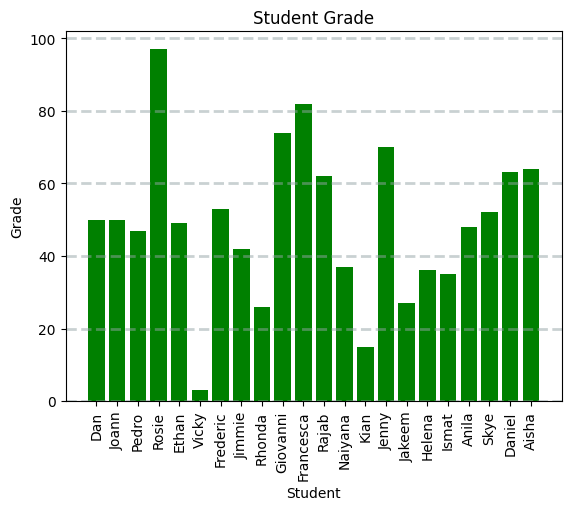

In [32]:
plt.bar(x=df_students['Name'], 
        height=df_students['Grade'], 
        color='Green')
plt.title('Student Grade')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6',
        linestyle='--',
        linewidth=2,
        axis='y',
        alpha=0.5)
plt.xticks(rotation=90)
plt.show()

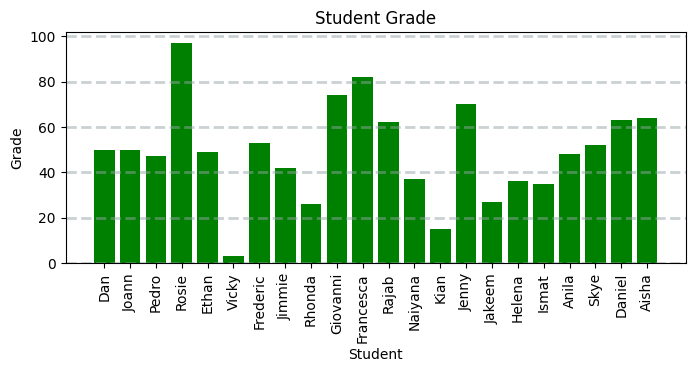

In [35]:
fig = plt.figure(figsize=(8,3))

plt.bar(x=df_students['Name'], 
        height=df_students['Grade'], 
        color='Green')
plt.title('Student Grade')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6',
        linestyle='--',
        linewidth=2,
        axis='y',
        alpha=0.5)
plt.xticks(rotation=90)

plt.show()

C:\Users\65859\AppData\Local\Temp\ipykernel_4112\1360059216.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students['Name'], rotation=90)
C:\Users\65859\AppData\Local\Temp\ipykernel_4112\1360059216.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


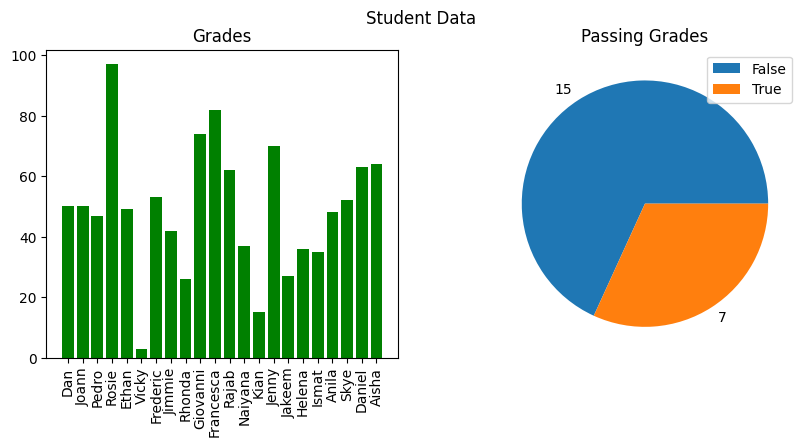

In [37]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].bar(x=df_students['Name'], 
        height=df_students['Grade'], 
        color='Green')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students['Name'], rotation=90)

pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

fig.suptitle('Student Data')

fig.show()

<AxesSubplot: xlabel='Name'>

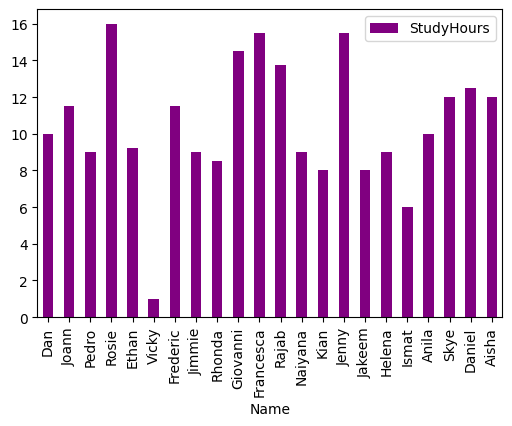

In [39]:
df_students.plot.bar(x='Name',
                    y='StudyHours',
                    color='purple',
                    figsize=(6,4))

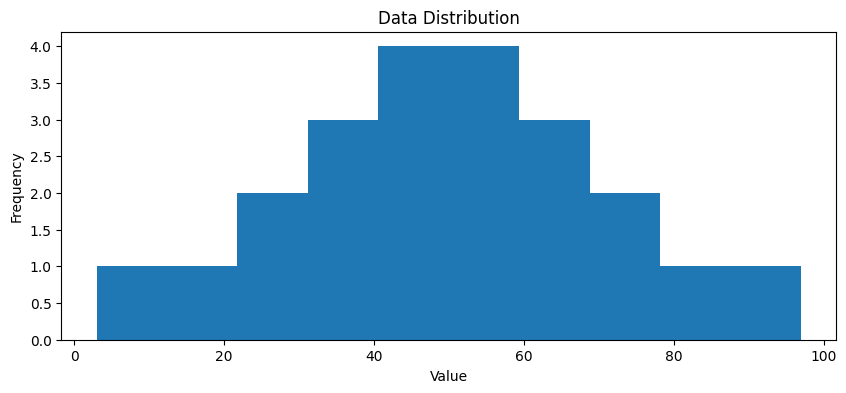

In [42]:
fig = plt.figure(figsize=(10,4))

plt.hist(df_students['Grade'])
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()


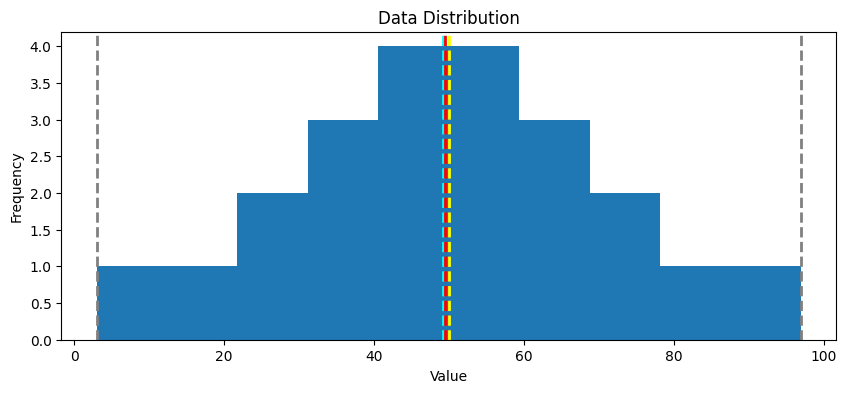

In [45]:
var = df_students['Grade']

min_val=var.min()
max_val=var.max()
mean_val = var.mean()
median_val=var.median()
mode_val=var.mode()[0]

fig=plt.figure(figsize=(10,4))

plt.hist(var)

plt.axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2)
plt.axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2)
plt.axvline(x=median_val, color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=mode_val, color='yellow', linestyle='dashed', linewidth=2)
plt.axvline(x=max_val, color='gray', linestyle='dashed', linewidth=2)

plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

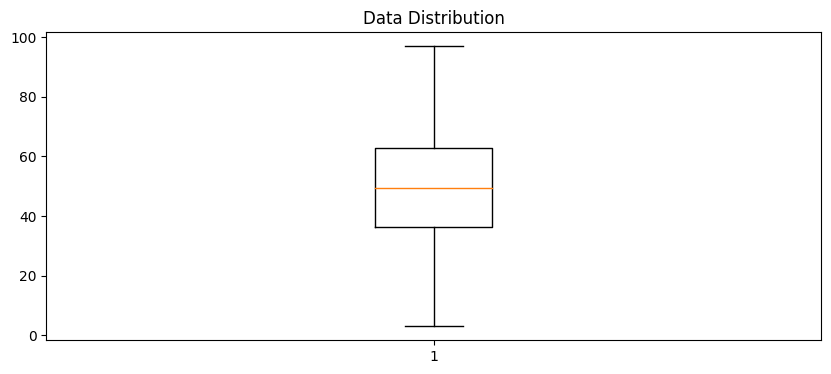

In [47]:
fig=plt.figure(figsize=(10,4))

plt.boxplot(df_students['Grade'])
plt.title('Data Distribution')

plt.show()

C:\Users\65859\AppData\Local\Temp\ipykernel_4112\2517141081.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


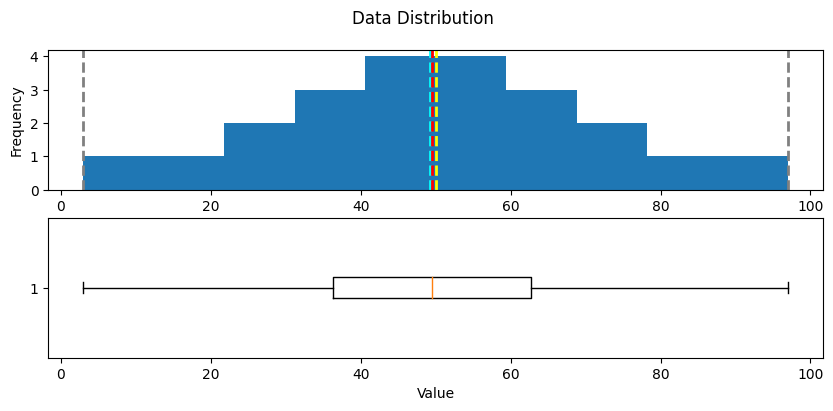

In [48]:
var = df_students['Grade']

min_val=var.min()
max_val=var.max()
mean_val = var.mean()
median_val=var.median()
mode_val=var.mode()[0]

fig, ax=plt.subplots(2,1,figsize=(10,4))

ax[0].hist(var)
ax[0].set_ylabel('Frequency')

ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2)
ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2)
ax[0].axvline(x=median_val, color='red', linestyle='dashed', linewidth=2)
ax[0].axvline(x=mode_val, color='yellow', linestyle='dashed', linewidth=2)
ax[0].axvline(x=max_val, color='gray', linestyle='dashed', linewidth=2)

ax[1].boxplot(var, vert=False)
ax[1].set_xlabel('Value')

plt.suptitle('Data Distribution')

fig.show()

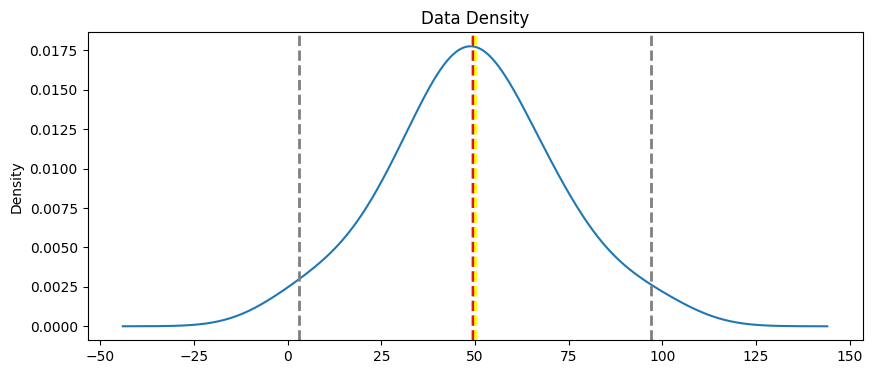

In [54]:
# !pip install scipy
var = df_students['Grade']

min_val=var.min()
max_val=var.max()
mean_val = var.mean()
median_val=var.median()
mode_val=var.mode()[0]

fig=plt.figure(figsize=(10,4))

var.plot.density()

plt.axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2)
plt.axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2)
plt.axvline(x=median_val, color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=mode_val, color='yellow', linestyle='dashed', linewidth=2)
plt.axvline(x=max_val, color='gray', linestyle='dashed', linewidth=2)

plt.title('Data Density')

plt.show()

In [56]:
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\65859\AppData\Local\Temp\ipykernel_4112\3907833401.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


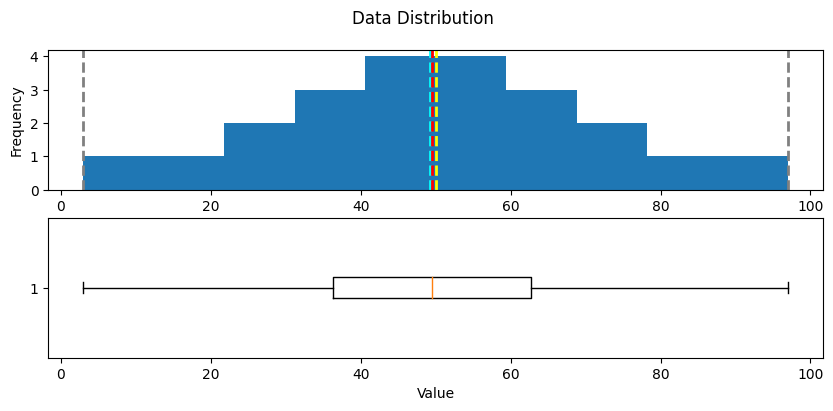

In [57]:
show_distribution(df_students['Grade'])


Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\65859\AppData\Local\Temp\ipykernel_4112\3907833401.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


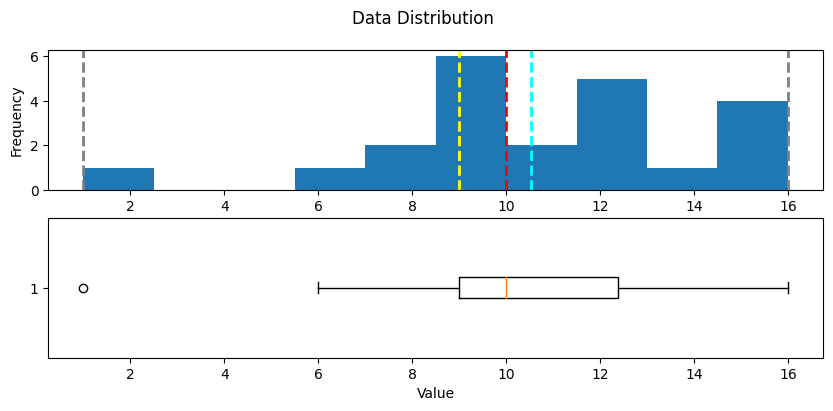

In [59]:
col=df_students['StudyHours']
show_distribution(col)

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\65859\AppData\Local\Temp\ipykernel_4112\3907833401.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


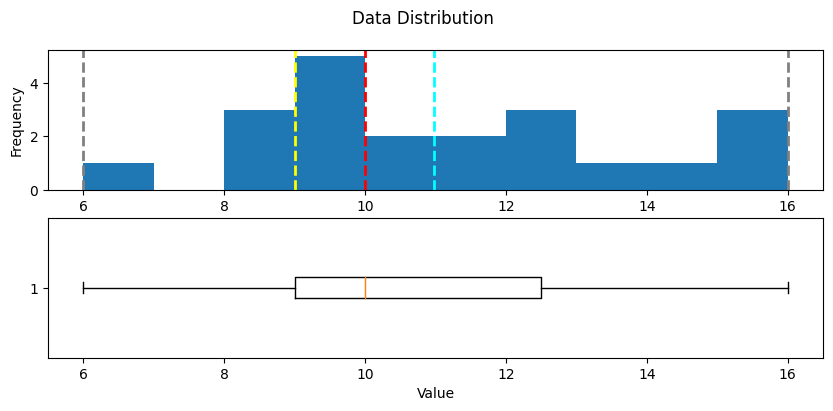

In [62]:
col=df_students[(df_students['StudyHours']>1)]['StudyHours']
show_distribution(col)

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\65859\AppData\Local\Temp\ipykernel_4112\3907833401.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


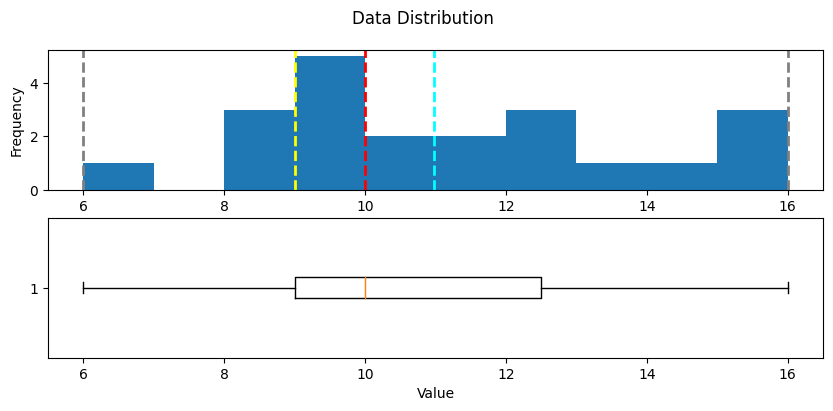

In [65]:
q01 = df_students['StudyHours'].quantile(0.01)
col = df_students[df_students['StudyHours']>q01]['StudyHours']
show_distribution(col)

In [66]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

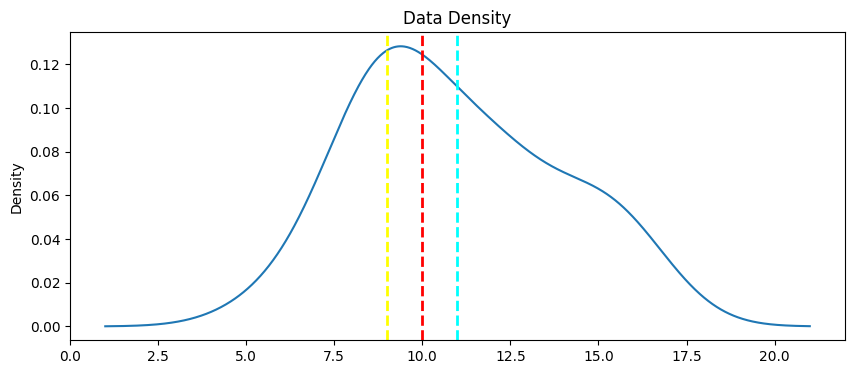

In [67]:
show_density(col)

In [71]:
for col_name in ['Grade','StudyHours']:
    col=df_students[col_name]
    rng=col.max()-col.min()
    var=col.var()
    std=col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std Dev.: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std Dev.: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std Dev.: 3.49


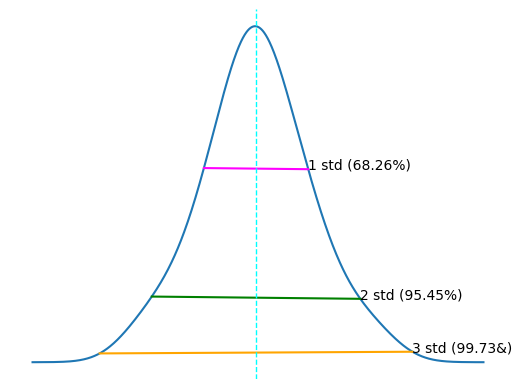

In [74]:
import scipy.stats as stats

col = df_students['Grade']
density=stats.gaussian_kde(col)
col.plot.density()

s=col.std()
m=col.mean()

x1=[m-s, m+s]
y1=density(x1)

plt.plot(x1, y1, color='magenta')
plt.annotate('1 std (68.26%)',(x1[1],y1[1]))

x2=[m-(s*2),m+(s*2)]
y2=density(x2)
plt.plot(x2,y2, color='green')
plt.annotate('2 std (95.45%)',(x2[1],y2[1]))

x3=[m-(s*3), m+(s*3)]
y3=density(x3)
plt.plot(x3,y3,color='orange')
plt.annotate('3 std (99.73&)', (x3[1],y3[1]))

plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.axis('off')

plt.show()

In [75]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


In [76]:
df_sample=df_students[df_students['StudyHours']>1]
df_sample

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True
10,Francesca,15.50,82.0,True


<AxesSubplot: title={'center': 'StudyHours'}, xlabel='Pass'>

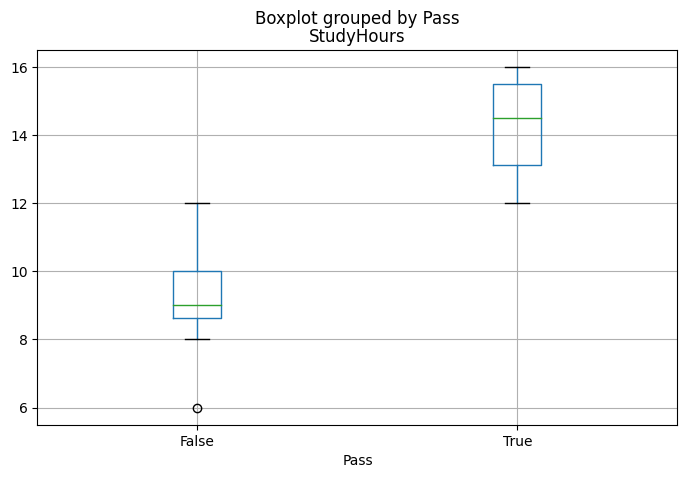

In [78]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

<AxesSubplot: xlabel='Name'>

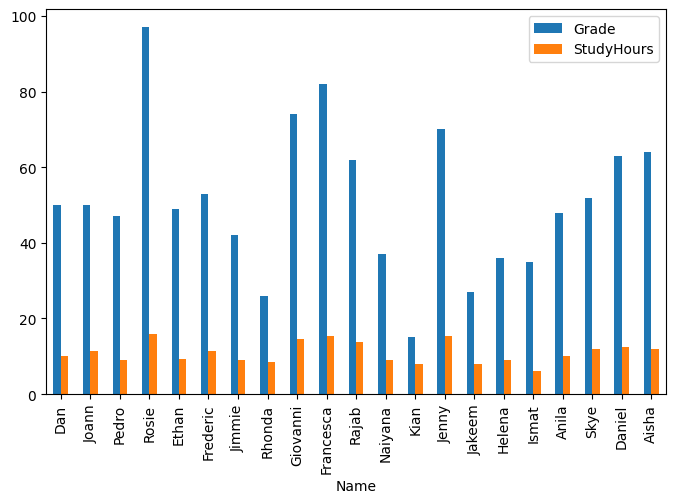

In [79]:
df_sample.plot(x='Name', 
               y=['Grade','StudyHours'], 
               kind='bar', 
               figsize=(8,5))

<AxesSubplot: xlabel='Name'>

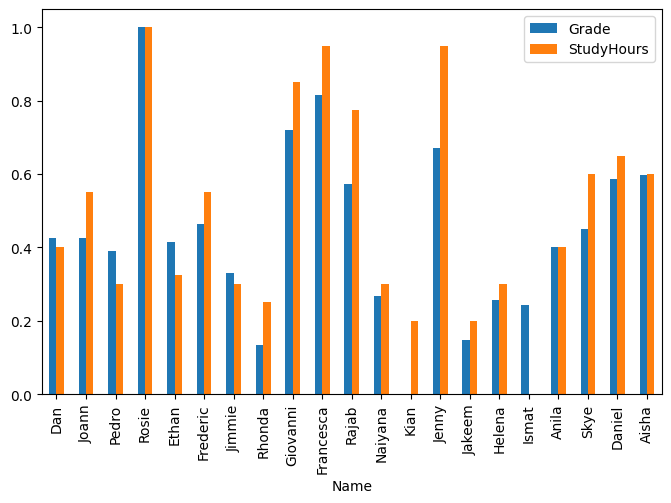

In [84]:
# !pip install sklearn
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

df_Normalized = df_sample[['Name','Grade','StudyHours']].copy()
df_Normalized[['Grade','StudyHours']]=scaler.fit_transform(df_Normalized[['Grade','StudyHours']])

df_Normalized.plot(x='Name',
                  y=['Grade','StudyHours'], 
                  kind='bar',
                  figsize=(8,5))

In [85]:
df_Normalized['Grade'].corr(df_Normalized['StudyHours'])

0.9117666413789677

<AxesSubplot: title={'center': 'S?tudy Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

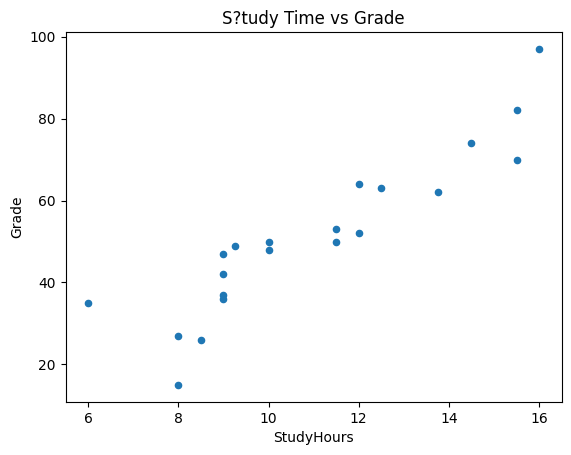

In [86]:
df_sample.plot.scatter(title='S?tudy Time vs Grade', 
                       x='StudyHours', 
                       y='Grade')

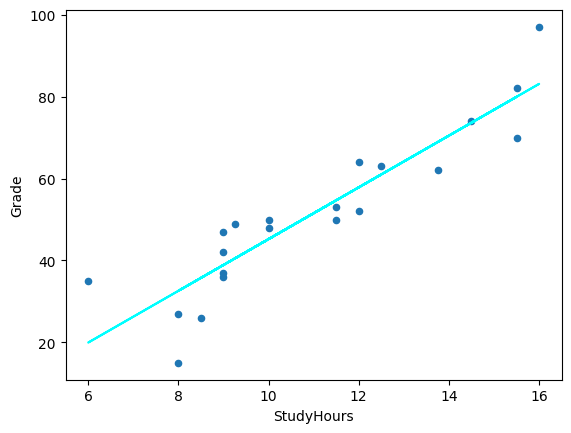

In [89]:
from scipy import stats 

df_regression = df_sample[['Grade','StudyHours']].copy()

m, b, r, p, se=stats.linregress(df_regression['StudyHours'],df_regression['Grade'])

df_regression['fx']=(m*df_regression['StudyHours'])+b

df_regression['error']=df_regression['fx']-df_regression['Grade']

df_regression.plot.scatter(x='StudyHours', y='Grade')

plt.plot(df_regression['StudyHours'], df_regression['fx'], color='cyan')

plt.show()

In [95]:
df_regression[['StudyHours','Grade','fx','error']]

,StudyHours,Grade,fx,error
0,10.00,50.0,45.217846,-4.782154
1,11.50,50.0,54.687985,4.687985
2,9.00,47.0,38.904421,-8.095579
3,16.00,97.0,83.098400,-13.901600
4,9.25,49.0,40.482777,-8.517223
6,11.50,53.0,54.687985,1.687985
7,9.00,42.0,38.904421,-3.095579
8,8.50,26.0,35.747708,9.747708
9,14.50,74.0,73.628262,-0.371738
10,15.50,82.0,79.941687,-2.058313


In [97]:
def f(x):
    m=6.31324
    b=-17.9164
    return m*x+b
study_time=14
prediction=f(study_time)
expected_grade=max(1, min(100, prediction))
'{:.0f}'.format(expected_grade)

'70'